In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
# WIthout Mask

nomask_mean_train_df = pd.read_csv("nomask/mean_val_per_patch_train.csv")
nomask_mean_test_df = pd.read_csv("nomask/mean_val_per_patch_test.csv")
target_df = gpd.read_file("target_yield.shp")

nomask_mean_df = pd.concat([nomask_mean_train_df,nomask_mean_test_df])
nomask_mean_df_merge = target_df.merge(nomask_mean_df,on="patch_name")

In [10]:
nomask_mean_df_merge.head()

,patch_name,year,yld_kg_sqm,ndvi_avg,ndvi_max,ndvi_min,ykg_by_e7,geometry,Unnamed: 0,sal,wdrvi,evi,ndmi,ndvi,savi,cdl_val
0,Nebraska_2017_july_13824-2048,2017,3.733028e+07,0.668031,0.842914,0.120116,3.733028,"POLYGON ((-96.46451 41.76034, -96.60249 41.760...",15668,0.823507,0.744839,0.725052,0.762173,0.847278,0.731592,Corn
1,Nebraska_2017_july_13824-2048,2017,3.733028e+07,0.668031,0.842914,0.120116,3.733028,"POLYGON ((-96.46451 41.76034, -96.60249 41.760...",15669,0.793602,0.530437,0.582695,0.617883,0.675745,0.604494,Soybeans
2,Nebraska_2017_july_13824-2048,2017,3.733028e+07,0.668031,0.842914,0.120116,3.733028,"POLYGON ((-96.46451 41.76034, -96.60249 41.760...",15670,0.583676,0.352116,0.395355,0.506659,0.516035,0.417130,Grassland/Pasture
3,Nebraska_2017_july_13824-2048,2017,3.733028e+07,0.668031,0.842914,0.120116,3.733028,"POLYGON ((-96.46451 41.76034, -96.60249 41.760...",15671,0.709500,0.416279,0.485526,0.602122,0.582500,0.509483,Developed/Open Space
4,Nebraska_2017_july_9728-1536,2017,1.410707e+06,0.277964,0.686806,0.147658,0.141071,"POLYGON ((-98.67221 42.03630, -98.81019 42.036...",41272,0.007131,0.411537,0.446040,0.593852,0.582224,0.473001,Grassland/Pasture


In [23]:
nomask_mean_df_corn = nomask_mean_df_merge.query("cdl_val == 'Corn'")
nomask_mean_df_soybean = nomask_mean_df_merge.query("cdl_val == 'Soybeans'")
year_list = ['2017','2018','2019','2020','2021']

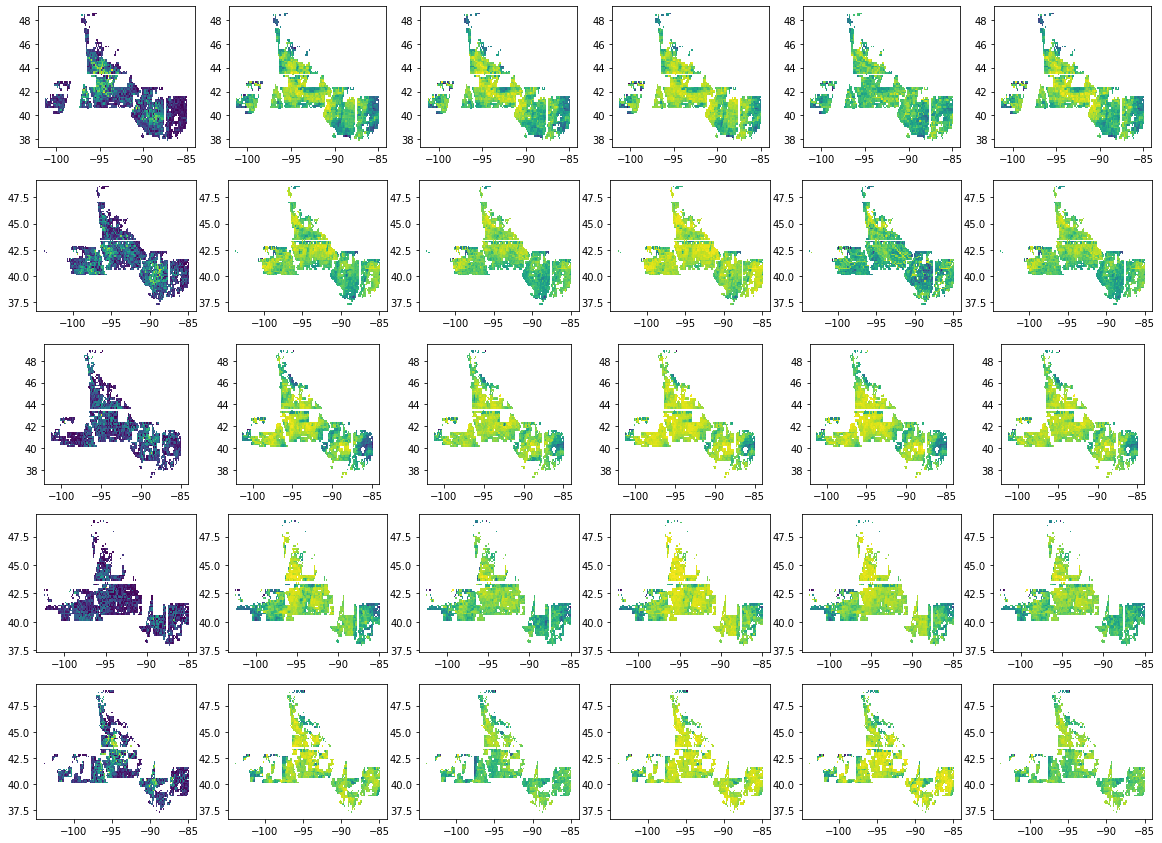

In [24]:

fig,ax = plt.subplots(5,6,figsize=(20,15))

for i in range(len(year_list)):
    nomask_mean_df_corn.query("year == "+year_list[i]).plot(column="sal",ax=ax[i,0])
    nomask_mean_df_corn.query("year == "+year_list[i]).plot(column="wdrvi",ax=ax[i,1])
    nomask_mean_df_corn.query("year == "+year_list[i]).plot(column="evi",ax=ax[i,2])
    nomask_mean_df_corn.query("year == "+year_list[i]).plot(column="ndvi",ax=ax[i,3])
    nomask_mean_df_corn.query("year == "+year_list[i]).plot(column="ndmi",ax=ax[i,4])
    nomask_mean_df_corn.query("year == "+year_list[i]).plot(column="savi",ax=ax[i,5])

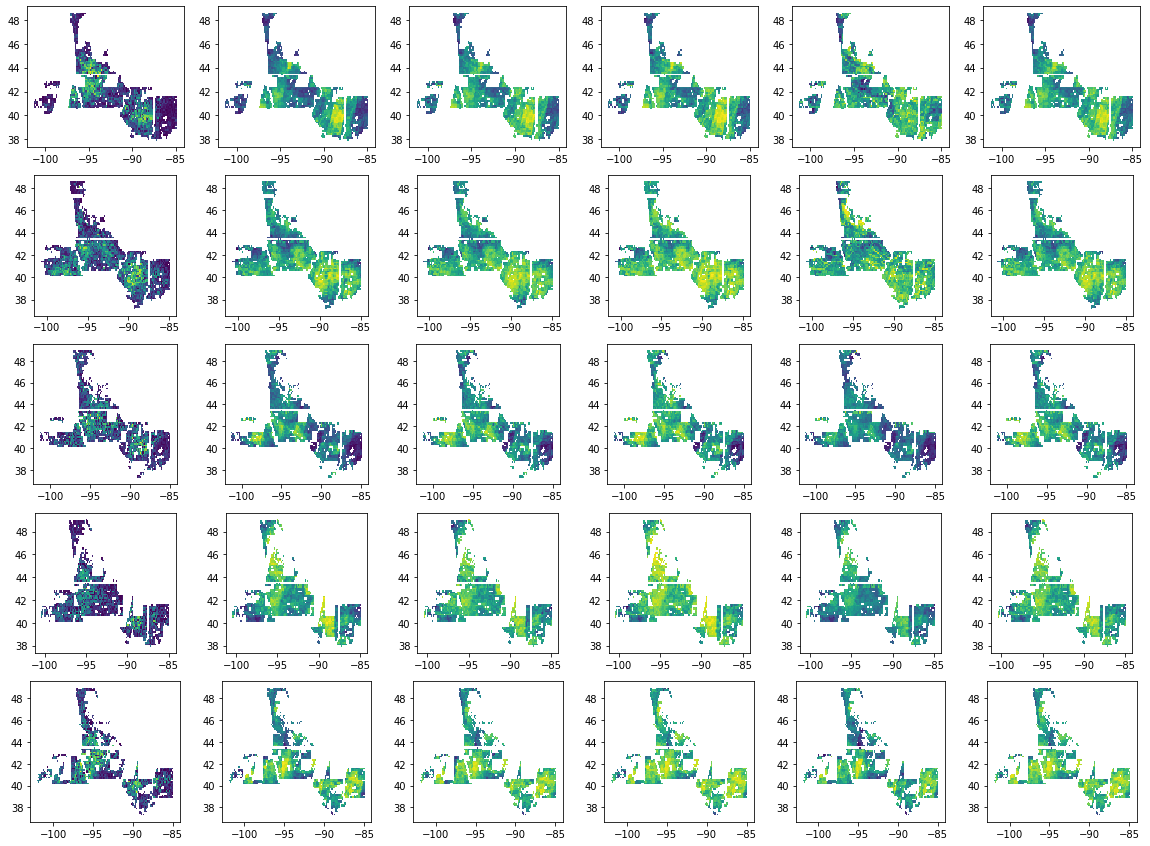

In [25]:
fig,ax = plt.subplots(5,6,figsize=(20,15))
for i in range(len(year_list)):
    nomask_mean_df_soybean.query("year == "+year_list[i]).plot(column="sal",ax=ax[i,0])
    nomask_mean_df_soybean.query("year == "+year_list[i]).plot(column="wdrvi",ax=ax[i,1])
    nomask_mean_df_soybean.query("year == "+year_list[i]).plot(column="evi",ax=ax[i,2])
    nomask_mean_df_soybean.query("year == "+year_list[i]).plot(column="ndvi",ax=ax[i,3])
    nomask_mean_df_soybean.query("year == "+year_list[i]).plot(column="ndmi",ax=ax[i,4])
    nomask_mean_df_soybean.query("year == "+year_list[i]).plot(column="savi",ax=ax[i,5])

In [28]:
nomask_mean_df_soybean[['sal','wdrvi']]

,sal,wdrvi
1,0.793602,0.530437
18,0.211662,0.284638
26,0.020098,0.278051
30,0.069078,0.175104
34,0.140938,0.283125
...,...,...
57671,0.324891,0.694885
57673,0.188024,0.425459
57677,0.006715,0.471570
57684,0.508753,0.652220
